In [99]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')


In [100]:
df=pd.read_csv('salary.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [101]:
df.shape

(35, 2)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [103]:
df.dtypes

YearsExperience    float64
Salary               int64
dtype: object

In [104]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [105]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

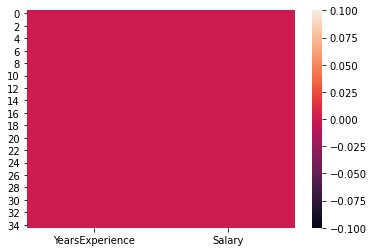

In [106]:
sns.heatmap(df.isnull())

In [107]:
df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


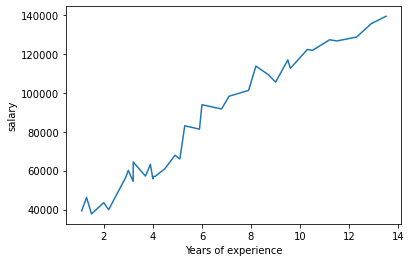

In [108]:
plt.plot(df['YearsExperience'],df['Salary'])
plt.xlabel('Years of experience')
plt.ylabel('salary')
plt.show()

#graph clearly shows that salary is directly proportional to years of experience

In [109]:
df.skew()

YearsExperience    0.420163
Salary             0.209005
dtype: float64

In [110]:
from scipy.stats import zscore
z_score=np.abs(zscore(df))
print(df.shape)
df_new=df.loc[(z_score<3).all(axis=1)]
print(df_new.shape)

(35, 2)
(35, 2)


In [111]:
#No outliers are present

In [112]:
x=df.iloc[:,:-1].values

In [113]:
y=df.iloc[:,1]

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30)

In [115]:
print('x_train_shape:',x_train.shape)
print('x_test_shape:',x_test.shape)
print('y_train_shape:',y_train.shape)
print('y_test_shape:',y_test.shape)

x_train_shape: (24, 1)
x_test_shape: (11, 1)
y_train_shape: (24,)
y_test_shape: (11,)


In [116]:
lg=LinearRegression()
lg.fit(x_train,y_train)

LinearRegression()

In [117]:
y_pred=lg.predict(x_test)

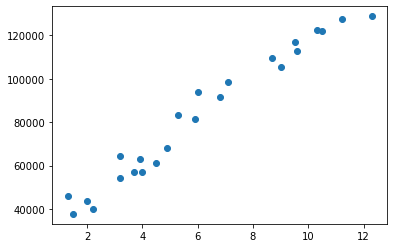

In [118]:
plt.scatter(x_train,y_train)

In [119]:
print('r2_score is',r2_score(y_test,y_pred))
print('RMSE is',np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score is 0.9600856275600482
RMSE is 7088.120054474429


In [121]:
from sklearn.linear_model import Lasso,Ridge

In [123]:
ls=Lasso(alpha=0.0001)

ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.9664766021852222

In [124]:
ls.coef_


array([8973.23121542])

In [128]:
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.9664766021850731

In [129]:
rd.coef_

array([8973.22770121])

In [130]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.9664766021637572


array([8973.18893671])

In [131]:
from sklearn.svm import SVR
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.013890151603601186
0.21320436248768349
0.00011083099548703235


In [132]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=42)


rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(r2_score(y_test,predrf))
print(mean_squared_error(y_test,predrf))
print(mean_absolute_error(y_test,predrf))

0.9781520569675849
27500676.5967788
4141.085151515153


In [133]:
from sklearn.ensemble import AdaBoostRegressor


ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)

print(r2_score(y_test,ad_pred))
print(mean_squared_error(y_test,ad_pred))
print(mean_absolute_error(y_test,ad_pred))

0.9752281971438521
31181028.7153965
4445.8374655647385
